In [75]:
import networkx as nx
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# For this analysis, I will choose computer science.

# edges from doctorate institution (node) u to faculty institution (node) v


In [93]:
# Load the edge data
edges = pd.read_csv('hiring_data//ComputerScience_edgelist.txt', sep='\t', header=None , names=['u', 'v', 'rank', 'gender'])

# Load the node data
vertices = pd.read_csv('hiring_data//ComputerScience_vertexlist.txt', sep='\t', header=None , names=['u', 'pi', 'USN2010', 'NRC95', 'Region', 'institution'])

# Create a directed graph
G = nx.from_pandas_edgelist(edges, 'u', 'v', create_using=nx.DiGraph(), edge_attr=['rank'])

# Add node metadata to the graph
for node, data in vertices.set_index('u').to_dict().items():
    nx.set_node_attributes(G, {node: data})

nx.write_gexf(G, "hiring_network.gexf")

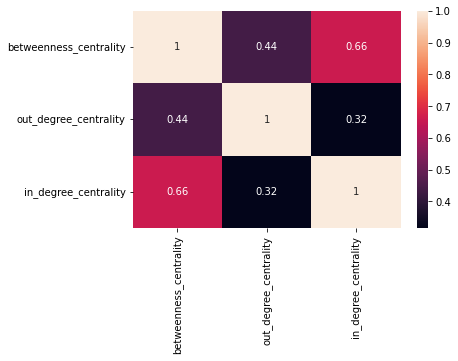

In [77]:
# Calculate the betweenness centrality for each vertex
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate the out-degree centrality for each vertex
out_degree_centrality = nx.out_degree_centrality(G)

# Calculate the in-degree centrality for each vertex
in_degree_centrality = nx.in_degree_centrality(G)


# Create a dataframe to store the calculated centralities and reciprocity
centralities = pd.DataFrame({'USN2010': vertices['USN2010'],
                             'betweenness_centrality': betweenness_centrality,
                             'out_degree_centrality': out_degree_centrality,
                             'in_degree_centrality': in_degree_centrality})

# Calculate the correlation matrix
correlation_matrix = centralities.corr()

# Plot the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True)
plt.show()

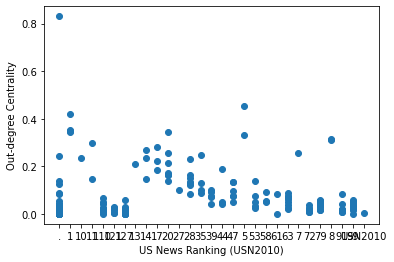

In [78]:
# Calculate the out-degree centrality for each node
out_degree_centrality = nx.out_degree_centrality(G)

# Sort the vertices dataframe based on the USN2010 column
vertices = vertices.sort_values(by='USN2010')

# Create a scatter plot of the US News ranking and out-degree centrality
x = vertices['USN2010']
y = [out_degree_centrality[node] for node in vertices['u']]
 
fig, ax = plt.subplots()
ax.scatter(x, y)

# Label the x and y axes
ax.set_xlabel('US News Ranking (USN2010)')
ax.set_ylabel('Out-degree Centrality')

# Show the plot
plt.show()

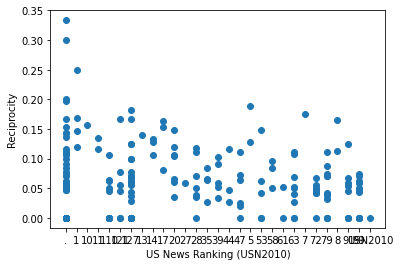

In [79]:
# Calculate reciprocity for each node
reciprocity_dict = {}
for node in G.nodes():
    reciprocity_dict[node] = sum([1 for edge in G.edges(node) if (edge[1], edge[0]) in G.edges()]) / G.degree(node)

# Sort the vertices dataframe based on the USN2010 column
vertices = vertices.sort_values(by='USN2010')

# Create a scatter plot of the US News ranking and reciprocity
x = vertices['USN2010']
y = [reciprocity_dict[node] for node in vertices['u']]

fig, ax = plt.subplots()
ax.scatter(x, y)

# Label the x and y axes
ax.set_xlabel('US News Ranking (USN2010)')
ax.set_ylabel('Reciprocity')

# Show the plot
plt.show()

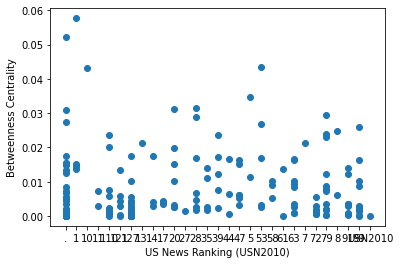

In [80]:
# Calculate betweenness centrality for each node
betweenness_centrality = nx.betweenness_centrality(G)

# Sort the vertices dataframe based on the USN2010 column
vertices = vertices.sort_values(by='USN2010')

# Create a scatter plot of the US News ranking and betweenness centrality
x = vertices['USN2010']
y = [betweenness_centrality[node] for node in vertices['u']]

fig, ax = plt.subplots()
ax.scatter(x, y)

# Label the x and y axes
ax.set_xlabel('US News Ranking (USN2010)')
ax.set_ylabel('Betweenness Centrality')

# Show the plot
plt.show()

# plot US News ranking vs Eccentricity

In [81]:
# Get the strongly connected components
strong_components = nx.strongly_connected_components(G)

# Keep only nodes in the largest strongly connected component
largest_component = max(strong_components, key=len)
Gs = G.subgraph(largest_component)

# Compute eccentricity of each node
eccentricities = nx.eccentricity(Gs)

# Convert eccentricities to a DataFrame
ecc_df = pd.DataFrame.from_dict(eccentricities, orient='index', columns=['eccentricity'])
ecc_df.index.name = 'node'

# Merge the eccentricity data with the US News ranking data
result = pd.merge(ecc_df, vertices[['u', 'USN2010']], left_index=True, right_on='u')

# Plot the US News ranking by eccentricity
fig = px.scatter(result, x='USN2010', y='eccentricity')
fig.show()

# Analysis of US News x Eccentricity


In [97]:
# Split the graph into two graphs based on gender
male_graph = nx.DiGraph()
female_graph = nx.DiGraph()

# Iterate over the edges in the original graph, starting from the second edge
for edge in edges[1:]:
    # Check the gender of the edge
    if edges.loc[edge[0], edge[1]].get('gender', None) == 'Male':
        male_graph.add_edge(edge[0], edge[1])
    elif edges.loc[edge[0], edge[1]].get('gender', None) == 'Female':
        female_graph.add_edge(edge[0], edge[1])

# Add nodes to the separate graphs
for node in G.nodes():
    male_graph.add_node(node)
    female_graph.add_node(node)

IndexError: string index out of range

# Visualize the whole network:


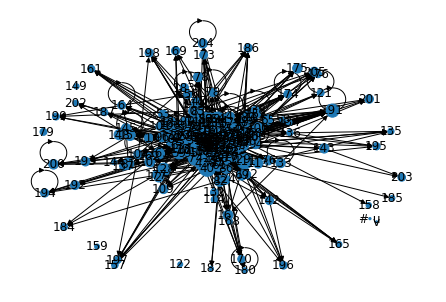

In [91]:
# Compute degree centrality of nodes in the network
out_degree_centrality = nx.degree_centrality(G)

# Filter edges to only include those corresponding to associate professors
associate_edges = [(u, v) for u, v, data in G.edges(data=True) if data['rank'] == 'Assoc']

# Visualize the network
nx.draw(G, pos=nx.spring_layout(G), node_size=[v * 1000 for v in out_degree_centrality.values()], edgelist=associate_edges, with_labels=True)
plt.show()